In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Load dataset
data_path = os.path.join("..", "data", "PS_20174392719_1491204439457_log.csv")
df = pd.read_csv(data_path)


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Basic info
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing Values:\n", df.isnull().sum())
print("\nFraud distribution:")
print(df['isFraud'].value_counts())

Dataset Shape: (6362620, 11)
Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Fraud distribution:
isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [5]:
# Fraud percentage
fraud_cases = df['isFraud'].value_counts()
fraud_percentage = (fraud_cases[1] / fraud_cases.sum()) * 100
print(f"\nFraud cases percentage: {fraud_percentage:.4f}%")



Fraud cases percentage: 0.1291%


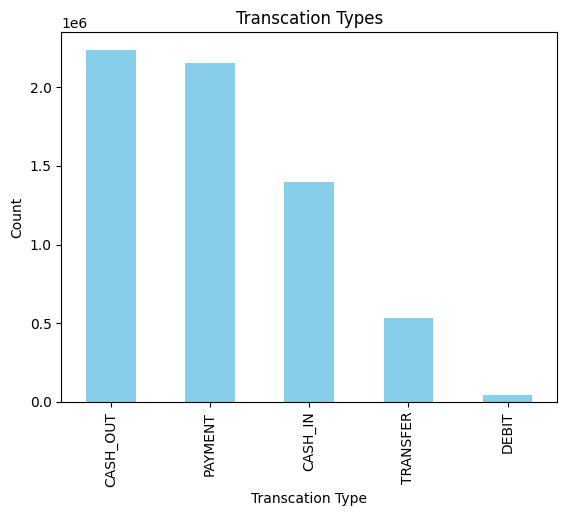

In [8]:
df["type"].value_counts().plot(kind="bar",title="Transcation Types",color="skyblue")
plt.xlabel("Transcation Type")
plt.ylabel("Count")
plt.show()

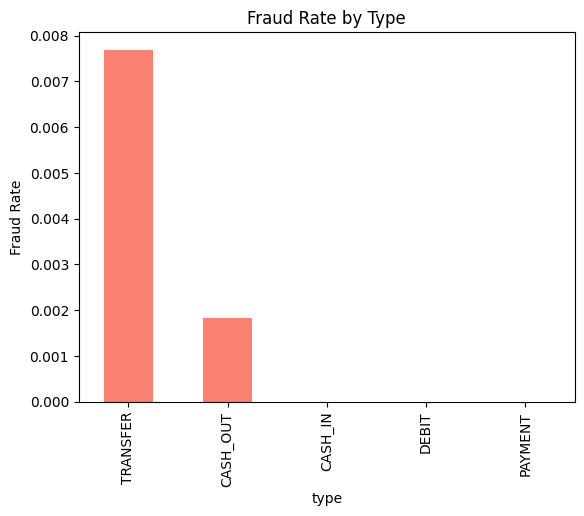

In [9]:
# Fraud rate by type
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [10]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

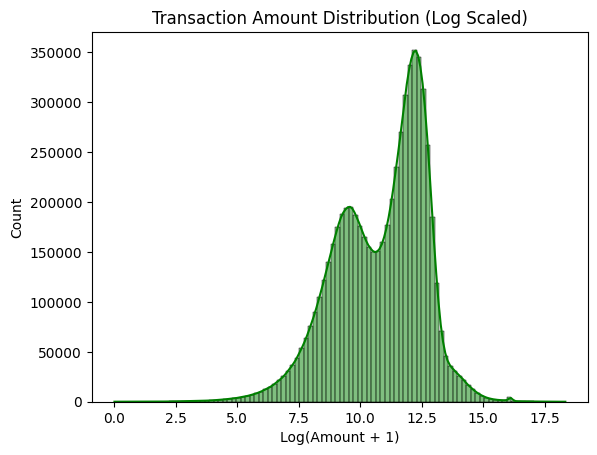

In [13]:
# Amount distribution
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.title("Transaction Amount Distribution (Log Scaled)")
plt.xlabel("Log(Amount + 1)")
plt.show()

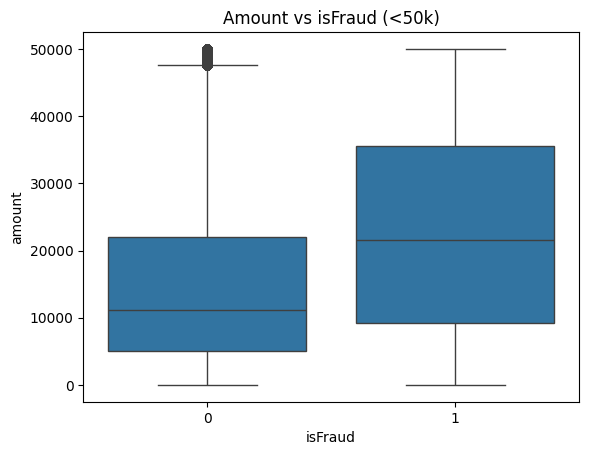

In [15]:
# Box plot: fraud vs amount
sns.boxplot(data=df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title("Amount vs isFraud (<50k)")
plt.show()

In [16]:
# Balance difference columns
df["bal_diff_orig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["bal_diff_dest"] = df["newbalanceDest"] - df["oldbalanceDest"]
print("Negative origin bal diff:", (df["bal_diff_orig"] < 0).sum())
print("Negative dest bal diff:", (df["bal_diff_dest"] < 0).sum())

Negative origin bal diff: 1399253
Negative dest bal diff: 1238864


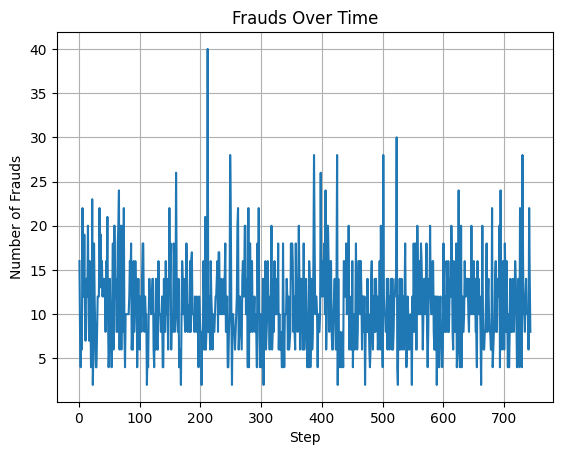

In [17]:
# Drop step after visualizing
fraud_steps = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(fraud_steps.index, fraud_steps.values)
plt.xlabel("Step")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [18]:
df.drop(columns="step", inplace=True)

In [19]:
df["nameOrig"].value_counts().head(10)

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [21]:
df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [20]:
df["nameDest"].value_counts().head(10)

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

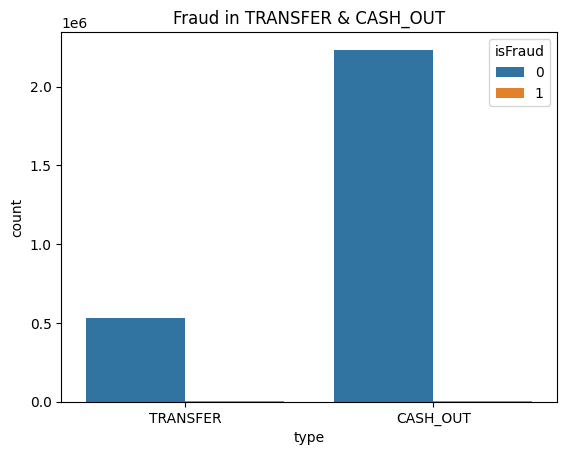

In [22]:
# Transfer & cash out fraud
filtered = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]
sns.countplot(data=filtered, x="type", hue="isFraud")
plt.title("Fraud in TRANSFER & CASH_OUT")
plt.show()

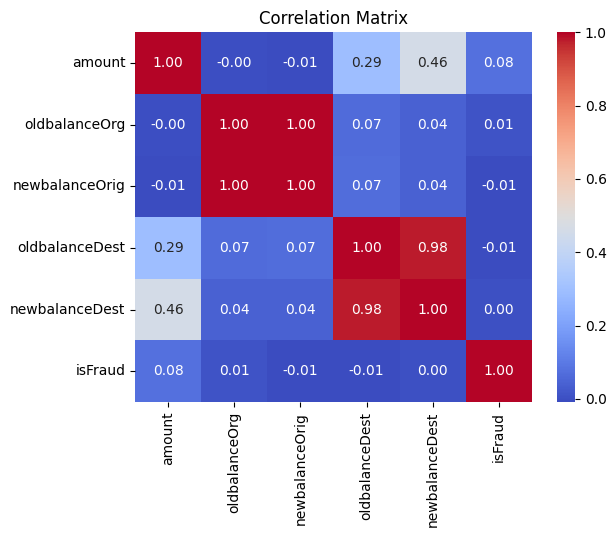

In [23]:
# Correlation matrix
corr = df[
    ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]
].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [24]:
# Suspicious 0 balance after transfers
zero_after = df[
    (df["oldbalanceOrg"] > 0)
    & (df["newbalanceOrig"] == 0)
    & (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]
print("Zero after transfer count:", len(zero_after))

Zero after transfer count: 1188074


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

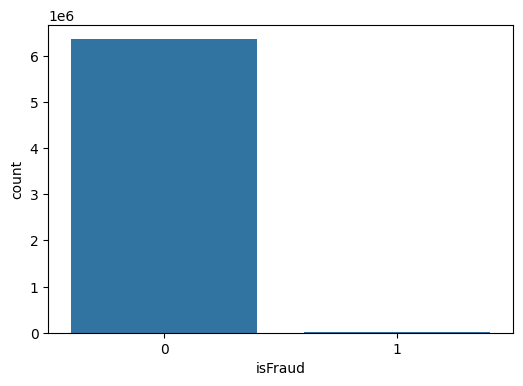

In [14]:
# Plot Fraud vs Non-Fraud distribution
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=df)
plt.title
